# Lab: MNIST Deep Autoencoder

Welcome back! In this lab, you will extend the shallow autoencoder you built in the previous exercise. The model here will have a deeper network so it can handle more complex images.

## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Prepare the Dataset

You will prepare the MNIST dataset just like in the previous lab.

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build the Model

As mentioned, you will have a deeper network for the autoencoder. Compare the layers here with that of the shallow network you built in the previous lab.

In [5]:
def deep_autoencoder():
  '''Builds the encoder and decoder using Dense layers.'''
  # START YOUR CODE HERE
  encoder =tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(784,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu')  #
    ])

  decoder =tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(64,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(784, activation='sigmoid')
    ])

  # END YOUR CODE HERE
  return encoder, decoder

# set the input tensor
inputs =  tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
deep_encoder_output, deep_autoencoder_output = deep_autoencoder()

# setup the encoder because you will visualize its output later
deep_encoder_model = tf.keras.Model(inputs=inputs, outputs=deep_encoder_output)

# setup the autoencoder
deep_autoencoder_model = tf.keras.Model(inputs=inputs, outputs=deep_autoencoder_output)

ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Sequential name=sequential_2, built=True> including invalid value <Sequential name=sequential_2, built=True> of type <class 'keras.src.models.sequential.Sequential'>

In [16]:
import tensorflow as tf

def deep_autoencoder():

    '''Builds the encoder and decoder using Dense layers.'''
    #START CODE HERE
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(784,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu')
    ])


    decoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(64,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(784, activation='sigmoid')
    ])
     # END YOUR CODE HERE
    return encoder, decoder

# Set the input tensor
inputs = tf.keras.layers.Input(shape=(784,))

# Get the encoder and decoder models
encoder, decoder = deep_autoencoder()

# Get the encoder output (latent representation)
deep_encoder_output = encoder(inputs)  # Pass the inputs tensor through the encoder


deep_autoencoder_output = decoder(deep_encoder_output)

deep_encoder_model = tf.keras.Model(inputs=inputs, outputs=deep_encoder_output)

deep_autoencoder_model = tf.keras.Model(inputs=inputs, outputs=deep_autoencoder_output)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## Compile and Train the Model

In [9]:
train_steps = 60000 // BATCH_SIZE

deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.2486
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1168
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1022
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0956
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0912
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0882
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0862
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0844
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0831
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0819
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0811
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0803
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0797
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0792
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

## Display sample results

See the results using the model you just trained.

In [17]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


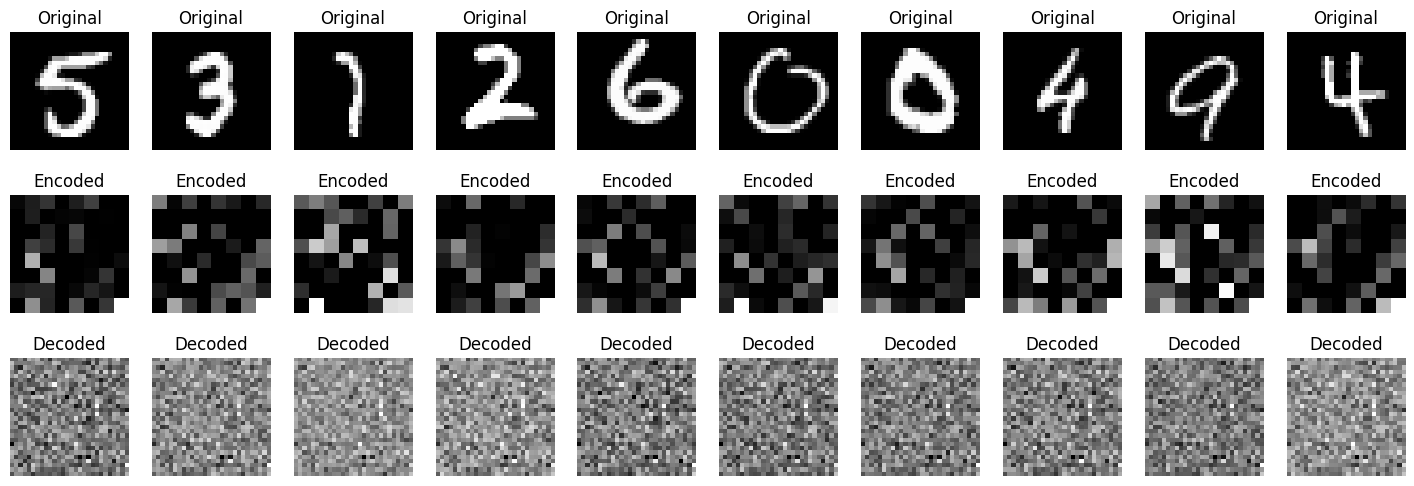

In [24]:


# Take 1 batch from the test dataset and convert to NumPy array
test_dataset_batch = test_dataset.take(1)
output_samples = np.array([input_image for input_image, _ in tfds.as_numpy(test_dataset_batch)])

# Flatten the output samples to match input shape expected by the model
output_samples = output_samples.reshape(-1, 784)  # Ensure shape is (batch_size, 784)

# Pick up to 10 random indices to sample
num_samples = output_samples.shape[0]
num_to_sample = min(10, num_samples)
idxs = np.random.choice(num_samples, size=num_to_sample, replace=False)

# Predict using encoder and decoder models
encoded_predicted = deep_encoder_model.predict(output_samples)
deep_predicted = deep_autoencoder_model.predict(output_samples)

# Display results
def display_results(original_images, encoded_images, decoded_images):
    plt.figure(figsize=(18, 6))
    for i in range(original_images.shape[0]):

        plt.subplot(3, original_images.shape[0], i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")


        plt.subplot(3, original_images.shape[0], i + 1 + original_images.shape[0])
        plt.imshow(encoded_images[i].reshape(8, 8), cmap="gray")
        plt.title("Encoded")
        plt.axis("off")


        plt.subplot(3, original_images.shape[0], i + 1 + 2 * original_images.shape[0])
        plt.imshow(decoded_images[i].reshape(28, 28), cmap="gray")
        plt.title("Decoded")
        plt.axis("off")

    plt.show()

display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])
